<a href="https://colab.research.google.com/github/RahulAdepu1/IT496/blob/main/Rahul_Adepu__CPM_PERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow_probability as tfp
tfd = tfp.distributions

tasksDF = pd.read_csv('/content/drive/MyDrive/IT 496/PERT-CPM.csv')
taskNames = tasksDF['tasks']
simulationsDF = pd.DataFrame(columns = taskNames)
print(simulationsDF.columns)
for index, task in tasksDF.iterrows():
  dist = tfd.PERT(low = task['ai '], peak = task['mi'], high = task['bi'], temperature = 4)
  simulationsDF[task['tasks']] = dist.sample(100000)
simulationsDF.to_csv('/content/drive/MyDrive/IT 496/simulationData100000.csv', index = False)
simulationsDF.head()

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'EOP'], dtype='object', name='tasks')


tasks,A,B,C,D,E,F,G,H,I,J,EOP
0,5.262389,4.612522,3.952837,2.772680,6.383645,2.009723,5.462637,2.968130,12.544882,3.793033,NaN
1,7.248892,5.408809,3.836685,2.901264,6.399332,4.993631,5.462218,2.176167,17.705135,2.343219,NaN
2,5.814403,3.313783,3.208249,2.643096,6.490937,1.611934,4.725624,4.606938,7.721645,2.915571,NaN
3,6.415333,4.067734,5.541726,2.617936,7.200307,2.700289,3.375421,4.861388,17.114447,3.728967,NaN
4,6.638574,4.771178,2.708806,2.536350,6.322742,2.997725,4.986611,3.897527,16.451206,2.448945,NaN


In [2]:
simulationDF = pd.read_csv("/content/drive/MyDrive/IT 496/simulationData100000.csv")
simulationDF.head(5)

,A,B,C,D,E,F,G,H,I,J,EOP
0,5.262389,4.612522,3.952837,2.772680,6.383645,2.009723,5.462637,2.968130,12.544882,3.793033,NaN
1,7.248892,5.408809,3.836685,2.901264,6.399332,4.993631,5.462218,2.176167,17.705135,2.343219,NaN
2,5.814403,3.313783,3.208249,2.643096,6.490937,1.611934,4.725624,4.606938,7.721645,2.915571,NaN
3,6.415333,4.067734,5.541726,2.617936,7.200307,2.700289,3.375421,4.861388,17.114447,3.728967,NaN
4,6.638574,4.771178,2.708806,2.536350,6.322742,2.997725,4.986611,3.897527,16.451206,2.448945,NaN


In [3]:
#Calculate the summation of all the Column Values
path1 = simulationDF['A']+simulationDF['D']+simulationDF['E']+simulationDF['J']
path2 = simulationDF['B']+simulationDF['C']+simulationDF['D']+simulationDF['E']+simulationDF['J']
path3 = simulationDF['B']+simulationDF['C']+simulationDF['F']+simulationDF['G']+simulationDF['J']
path4 = simulationDF['B']+simulationDF['C']+simulationDF['F']+simulationDF['H']+simulationDF['J']
path5 = simulationDF['B']+simulationDF['I']

#Create a new dataframe and add all the paths in it
pathDF=pd.DataFrame()
pathDF['A-D-E-J'] = path1
pathDF['B-C-D-E-J'] = path2
pathDF['B-C-D-F-G-J'] = path3
pathDF['B-C-D-F-H-J'] = path4
pathDF['B-I'] = path5

pathDF.head()

,A-D-E-J,B-C-D-E-J,B-C-D-F-G-J,B-C-D-F-H-J,B-I
0,18.211746,21.514716,19.830752,17.336245,17.157404
1,18.892707,20.889309,22.044562,18.758511,23.113944
2,17.864007,18.571637,15.775162,15.656476,11.035428
3,19.962543,23.156670,19.414136,20.900104,21.182181
4,17.946610,18.788020,17.913265,16.824180,21.222384


In [4]:
#Count the max of each column per row
#pathDF['max value'] = pathDF[['Path 1','Path 2','Path 3','Path 4','Path 5']].max(axis=1)

#get the ID of the Column which is max
pathDF['col name'] = pathDF[["A-D-E-J","B-C-D-E-J","B-C-D-F-G-J","B-C-D-F-H-J","B-I"]].idxmax(axis=1)

pathDF.head()

,A-D-E-J,B-C-D-E-J,B-C-D-F-G-J,B-C-D-F-H-J,B-I,col name
0,18.211746,21.514716,19.830752,17.336245,17.157404,B-C-D-E-J
1,18.892707,20.889309,22.044562,18.758511,23.113944,B-I
2,17.864007,18.571637,15.775162,15.656476,11.035428,B-C-D-E-J
3,19.962543,23.156670,19.414136,20.900104,21.182181,B-C-D-E-J
4,17.946610,18.788020,17.913265,16.824180,21.222384,B-I


In [5]:
#Create a counts Dataframe
counts = pd.DataFrame()

#Create a basic array to calculate
percentageOfPath = [0]*5

#Count the number of paths
counts['Path Count'] = pathDF['col name'].value_counts()

#Calculate the Percentage values up to two decimal values
for i in range(len(counts)):
  percentageOfPath[i] = round((counts['Path Count'][i]/100000)*100,2)

In [6]:
#Add the percentage values in a new column of the dataframe
counts['Percentage'] = percentageOfPath

lst = ["A-D-E-J","B-C-D-E-J","B-C-D-F-G-J","B-C-D-F-H-J","B-I"]
counts = counts.loc[lst]

counts.head()

,Path Count,Percentage
A-D-E-J,3824,3.82
B-C-D-E-J,33932,33.93
B-C-D-F-G-J,25425,25.42
B-C-D-F-H-J,14913,14.91
B-I,21906,21.91


Text(0.5, 0, 'Path Names')

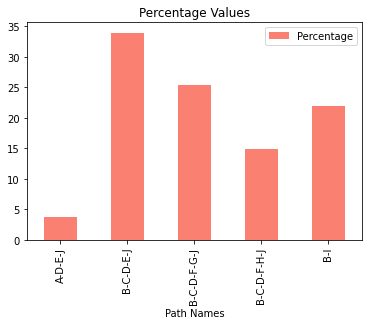

In [7]:
#Plot Graph
import matplotlib.pyplot as plt

counts.sort_values(by = 'Percentage', ascending=False)
counts.plot(y = "Percentage", label = 'Percentage', color='salmon', kind = 'bar')
plt.title("Percentage Values")
plt.xlabel("Path Names")